In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data - menggunakan low_memory=False karena dataset memiliki banyak kolom
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

# Cek 5 baris pertama
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 1. Hapus kolom yang memiliki missing values lebih dari 50%
# Dataset ini punya banyak kolom yang benar-benar kosong di tahun tersebut
df_clean = df.dropna(thresh=len(df) * 0.5, axis=1)

# 2. Hapus kolom identitas atau teks yang tidak bisa diolah model
# 'Unnamed: 0' adalah indeks lama, 'id' & 'member_id' hanya nomor urut
cols_to_drop = ['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'zip_code', 'policy_code', 'application_type']
df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])

print(f"Jumlah kolom awal: {df.shape[1]}")
print(f"Jumlah kolom setelah dibersihkan: {df_clean.shape[1]}")

Jumlah kolom awal: 75
Jumlah kolom setelah dibersihkan: 46


Distribusi Status Pinjaman Asli:
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8764\4007606733.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_clean, palette='Set1')


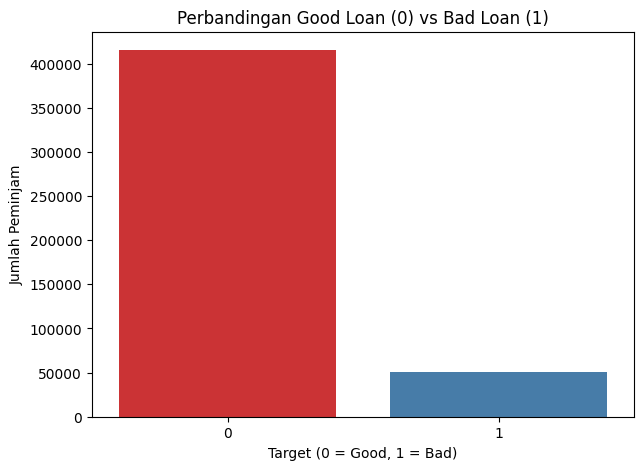

Proporsi Target:
target
0    89.069346
1    10.930654
Name: proportion, dtype: float64


In [3]:
# 1. Melihat distribusi unik dari loan_status
print("Distribusi Status Pinjaman Asli:")
print(df_clean['loan_status'].value_counts())

# 2. Menentukan daftar status yang masuk kategori 'Bad Loan' (Risiko Tinggi)
# Status ini menunjukkan peminjam yang gagal memenuhi kewajiban tepat waktu
bad_loan_status = [
    'Charged Off', 
    'Default', 
    'Does not meet the credit policy. Status:Charged Off', 
    'Late (31-120 days)'
]

# 3. Membuat kolom baru 'target'
# Nilai 1 untuk Bad Loan, Nilai 0 untuk Good Loan
df_clean['target'] = np.where(df_clean['loan_status'].isin(bad_loan_status), 1, 0)

# 4. Visualisasi untuk bahan presentasi/infografis
plt.figure(figsize=(7,5))
sns.countplot(x='target', data=df_clean, palette='Set1')
plt.title('Perbandingan Good Loan (0) vs Bad Loan (1)')
plt.xlabel('Target (0 = Good, 1 = Bad)')
plt.ylabel('Jumlah Peminjam')
plt.show()

# 5. Cek persentase perbandingannya
print(f"Proporsi Target:\n{df_clean['target'].value_counts(normalize=True) * 100}")

In [4]:
# 1. Mengubah 'term' (jangka waktu) menjadi angka (misal: ' 36 months' -> 36)
df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(int)

# 2. Mengubah 'emp_length' (lama bekerja) menjadi angka
# Kita asumsikan '< 1 year' sebagai 0 dan '10+ years' sebagai 10
df_clean['emp_length'] = df_clean['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

# 3. Mengubah 'grade' menjadi angka agar memiliki urutan risiko (A paling rendah risiko, G paling tinggi)
grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
df_clean['grade'] = df_clean['grade'].map(grade_map)

print("Berhasil mengolah kolom term, emp_length, dan grade.")
df_clean[['term', 'emp_length', 'grade']].head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8764\1386144847.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(int)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8764\1386144847.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_clean['emp_length'] = df_clean['emp_length'].str.extract('(\d+)').fillna(0).astype(int)


Berhasil mengolah kolom term, emp_length, dan grade.


,term,emp_length,grade
0,36,10,2
1,60,1,3
2,36,10,3
3,36,10,3
4,60,1,2


In [5]:
# 1. Mengubah kolom 'issue_d' menjadi format datetime
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%b-%y')

# 2. Menghitung durasi (dalam bulan) dari tanggal pinjaman sampai Desember 2025
# Semakin lama usia pinjaman, semakin banyak data histori pembayarannya
df_clean['mths_since_issue_d'] = round((pd.to_datetime('2025-12-01') - df_clean['issue_d']) / np.timedelta64(1, 'M'))

# 3. Hapus kolom tanggal asli karena sekarang sudah digantikan oleh versi angka
# Kita juga hapus kolom loan_status karena sudah kita ubah jadi kolom 'target'
cols_to_drop_date = ['issue_d', 'loan_status']
df_clean = df_clean.drop(columns=[c for c in cols_to_drop_date if c in df_clean.columns])

print("Kolom tanggal berhasil diubah menjadi durasi bulan.")
df_clean[['mths_since_issue_d']].head()

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [6]:
# 1. Pastikan kolom issue_d sudah dalam format datetime
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'], format='%b-%y')

# 2. Menghitung durasi bulan dengan cara yang didukung (selisih hari / 30.44)
# Kita hitung selisih hari dahulu, lalu bagi dengan rata-rata jumlah hari dalam sebulan
days_diff = (pd.to_datetime('2025-12-01') - df_clean['issue_d']).dt.days
df_clean['mths_since_issue_d'] = round(days_diff / 30.44)

# 3. Hapus kolom tanggal asli dan loan_status
cols_to_drop_date = ['issue_d', 'loan_status']
df_clean = df_clean.drop(columns=[c for c in cols_to_drop_date if c in df_clean.columns])

print("Perbaikan Berhasil! Kolom tanggal kini sudah menjadi durasi bulan.")
print(df_clean[['mths_since_issue_d']].head())

Perbaikan Berhasil! Kolom tanggal kini sudah menjadi durasi bulan.
   mths_since_issue_d
0               168.0
1               168.0
2               168.0
3               168.0
4               168.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8764\710484006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_indicators.values, y=top_indicators.index, palette='viridis')


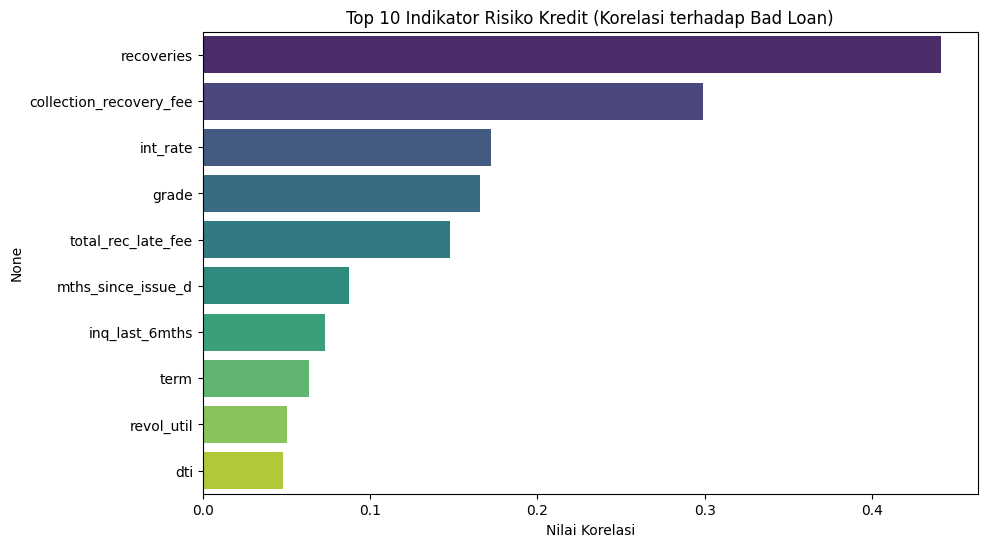

Indikator Risiko Teratas (Korelasi terhadap Bad Loan):
recoveries                 0.441171
collection_recovery_fee    0.299227
int_rate                   0.172361
grade                      0.165625
total_rec_late_fee         0.147750
mths_since_issue_d         0.087575
inq_last_6mths             0.073102
term                       0.063565
revol_util                 0.050207
dti                        0.048102
Name: target, dtype: float64


In [7]:
# 1. Menghitung korelasi numerik dengan target
correlations = df_clean.select_dtypes(exclude=['object']).corr()['target'].sort_values(ascending=False)

# 2. Ambil 10 faktor teratas (selain target itu sendiri yang nilainya pasti 1.0)
top_indicators = correlations.iloc[1:11]

# 3. Visualisasi untuk bahan Infografis
plt.figure(figsize=(10, 6))
sns.barplot(x=top_indicators.values, y=top_indicators.index, palette='viridis')
plt.title('Top 10 Indikator Risiko Kredit (Korelasi terhadap Bad Loan)')
plt.xlabel('Nilai Korelasi')
plt.show()

print("Indikator Risiko Teratas (Korelasi terhadap Bad Loan):")
print(top_indicators)

In [8]:
from sklearn.model_selection import train_test_split

# 1. Menentukan Fitur (X) dan Target (y)
# X adalah semua kolom angka kecuali target, y adalah kolom target (0/1)
X = df_clean.select_dtypes(exclude=['object']).drop(columns=['target'])
y = df_clean['target']

# 2. Mengisi sisa nilai kosong (NaN) dengan median
# Ini langkah keamanan terakhir agar model tidak error saat membaca data
X = X.fillna(X.median())

# 3. Membagi data menjadi Training dan Testing
# stratify=y sangat penting agar proporsi 10.9% Bad Loan tetap sama di kedua bagian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("--- Data Berhasil Dibagi ---")
print(f"Jumlah baris Data Training (untuk belajar): {X_train.shape[0]}")
print(f"Jumlah baris Data Testing (untuk ujian): {X_test.shape[0]}")
print(f"Jumlah kolom fitur: {X_train.shape[1]}")

--- Data Berhasil Dibagi ---
Jumlah baris Data Training (untuk belajar): 373028
Jumlah baris Data Testing (untuk ujian): 93257
Jumlah kolom fitur: 33


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Inisialisasi Model
# n_estimators=100: Menggunakan 100 pohon keputusan
# class_weight='balanced': Memberitahu model untuk lebih teliti pada nasabah 'Bad Loan' karena jumlahnya sedikit
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  random_state=42, 
                                  class_weight='balanced')

# 2. Melatih Model (Proses Belajar)
print("Sedang melatih model... (mungkin butuh waktu 1-2 menit)")
rf_model.fit(X_train, y_train)

# 3. Melakukan Prediksi (Ujian)
y_pred = rf_model.predict(X_test)

# 4. Evaluasi Hasil
print("\n--- HASIL EVALUASI MODEL ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Sedang melatih model... (mungkin butuh waktu 1-2 menit)

--- HASIL EVALUASI MODEL ---
Akurasi Model: 98.23%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83063
           1       0.97      0.86      0.91     10194

    accuracy                           0.98     93257
   macro avg       0.98      0.93      0.95     93257
weighted avg       0.98      0.98      0.98     93257



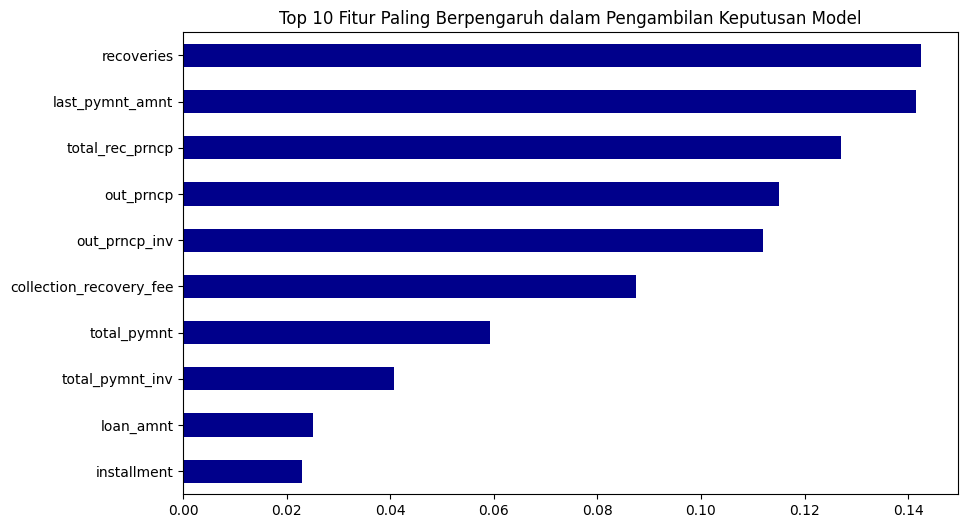

In [10]:
# Melihat variabel yang paling berpengaruh menurut model Random Forest
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='darkblue')
plt.title('Top 10 Fitur Paling Berpengaruh dalam Pengambilan Keputusan Model')
plt.gca().invert_yaxis()
plt.show()